In [8]:
from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values
import pandas

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

C:\Users\user\offvariance\notebooks\modules\utils.py:332: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['exp_g_total_zero'] = df['exp_g_H_zero'] + df['exp_g_A_zero']
C:\Users\user\offvariance\notebooks\modules\utils.py:333: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['exp_g_total_loc_zero'] = df['exp_g_H_loc_zero'] + df['exp_g_A_loc_zero']
C:\Users\user\offvariance\notebooks\modules\utils.py:334: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

In [9]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win1'] >= 1.8) & (games_df['odds_open_win1'] <= 2.8) &
(games_df['odds_open_tm25'] >= 2) & (games_df['odds_open_tm25'] <= 2.5)
]

Count: 194
Open profit: 1.6199999999999979
Close profit: 0.8499999999999965
Open ROI: 0.008350515463917515
Close ROI: 0.004381443298969054
UDI: 0.010941691921443944
AxesSubplot(0.125,0.125;0.775x0.755)


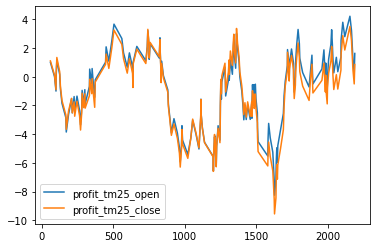

In [10]:
utils.print_total_under_result(segmented_df)

Count: 1
Open profit: -1.0
Close profit: -1.0
Open ROI: -1.0
Close ROI: -1.0
UDI: 0.1153846153846152
AxesSubplot(0.125,0.125;0.775x0.755)


,value,condition
exp_g_diff_H_A_loc_cop,108.9528,>=
exp_g_diff_A_H_loc_cop,-108.9528,<=


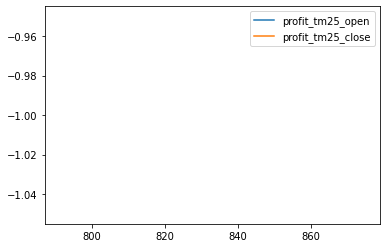

In [11]:
result = utils.create_strategy_by_udi(segmented_df, utils.metrics, 'udi_tm25')
utils.print_total_under_result(result.games_df)
result.metrics_df

In [12]:
result.games_df

,id,date_match,date_match_unix,time_first,time_match,team_1_id,team_1_name,team_1_goal,team_2_id,team_2_name,...,profit_win1_open,profit_win1_close,profit_draw_open,profit_draw_close,profit_win2_open,profit_win2_close,profit_tm25_open,profit_tm25_close,profit_tb25_open,profit_tb25_close
833,15225,06.10.2018,1538773200,48,94,6719,Leicester,1,6718,Everton,...,-1.0,-1.0,-1.0,-1.0,2.28,2.49,-1.0,-1.0,0.87,1.11


Count: 1
Open profit: -1.0
Close profit: -1.0
Open ROI: -1.0
Close ROI: -1.0
UDI: 0.1153846153846152
AxesSubplot(0.125,0.125;0.775x0.755)


,value,condition
exp_g_diff_H_A_loc_cop,108.9528,>=
exp_g_diff_A_H_loc_cop,-108.9528,>=


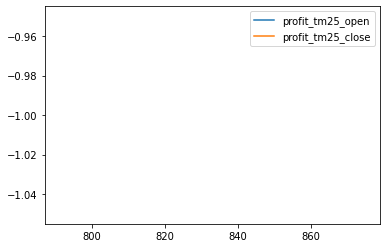

In [13]:
result = utils.create_strategy_by_udi(segmented_df, utils.metrics, 'udi_tm25', iterations=3)
utils.print_total_under_result(result.games_df)
result.metrics_df